In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CUSTOM CNN

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Remove background (Example: using simple thresholding)
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)  # Threshold for background separation
            masked_img = cv2.bitwise_and(img, img, mask=mask)
            # Resize image
            img = cv2.resize(masked_img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Define custom CNN model
# Define custom CNN model
model_custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_custom_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train custom CNN model
model_custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate custom CNN model
custom_cnn_loss, custom_cnn_accuracy = model_custom_cnn.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_custom_cnn = [custom_cnn_accuracy] * 10




Unable to read image: /content/drive/MyDrive/Stage2/1710490230430.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230456.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230470.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230476.jpg. Skipping...
Epoch 1/10
11/11 [==============================] - 6s 78ms/step - loss: 41.6157 - accuracy: 0.6884
Epoch 2/10
11/11 [==============================] - 1s 74ms/step - loss: 1.6504 - accuracy: 0.7734
Epoch 3/10
11/11 [==============================] - 1s 73ms/step - loss: 0.7873 - accuracy: 0.7450
Epoch 4/10
11/11 [==============================] - 1s 73ms/step - loss: 0.5551 - accuracy: 0.7932
Epoch 5/10
11/11 [==============================] - 1s 74ms/step - loss: 0.4751 - accuracy: 0.8102
Epoch 6/10
11/11 [==============================] - 1s 74ms/step - loss: 0.3476 - accuracy: 0.8555
Epoch 7/10
11/11 [==============================] - 1s 83ms/step - loss: 

Epoch 1/10
11/11 [==============================] - 1s 80ms/step - loss: 0.2793 - accuracy: 0.8754 - val_loss: 0.2417 - val_accuracy: 0.9326
Epoch 2/10
11/11 [==============================] - 1s 76ms/step - loss: 0.2903 - accuracy: 0.8754 - val_loss: 0.2146 - val_accuracy: 0.9213
Epoch 3/10
11/11 [==============================] - 1s 78ms/step - loss: 0.3061 - accuracy: 0.8867 - val_loss: 0.2305 - val_accuracy: 0.9326
Epoch 4/10
11/11 [==============================] - 1s 76ms/step - loss: 0.2670 - accuracy: 0.8754 - val_loss: 0.2124 - val_accuracy: 0.9213
Epoch 5/10
11/11 [==============================] - 1s 75ms/step - loss: 0.2880 - accuracy: 0.8754 - val_loss: 0.2039 - val_accuracy: 0.9213
Epoch 6/10
11/11 [==============================] - 1s 76ms/step - loss: 0.2632 - accuracy: 0.8810 - val_loss: 0.2002 - val_accuracy: 0.9213
Epoch 7/10
11/11 [==============================] - 1s 76ms/step - loss: 0.2829 - accuracy: 0.8839 - val_loss: 0.1969 - val_accuracy: 0.9101
Epoch 8/10
11

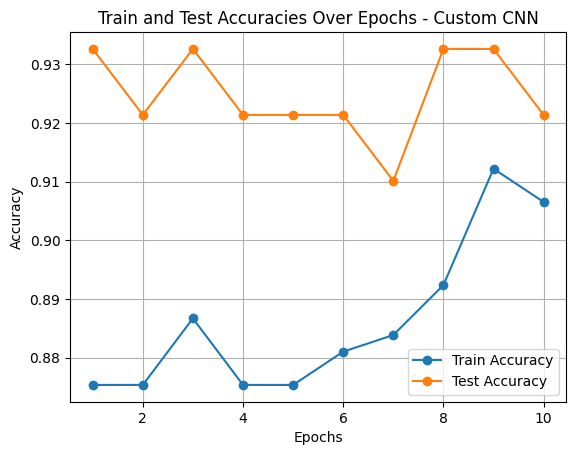

In [4]:
# Train custom CNN model
custom_cnn_history = model_custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_custom_cnn = custom_cnn_history.history['accuracy']
test_accuracies_custom_cnn = custom_cnn_history.history['val_accuracy']

# Plot the accuracies over epochs for Custom CNN
plt.plot(range(1, 11), train_accuracies_custom_cnn, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_custom_cnn, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - Custom CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

3/3 [==============================] - 0s 3ms/step
Accuracy: 0.9213483146067416
Precision: 0.8809523809523809
Recall: 0.9487179487179487
F1 Score: 0.9135802469135802
3/3 [==============================] - 0s 3ms/step


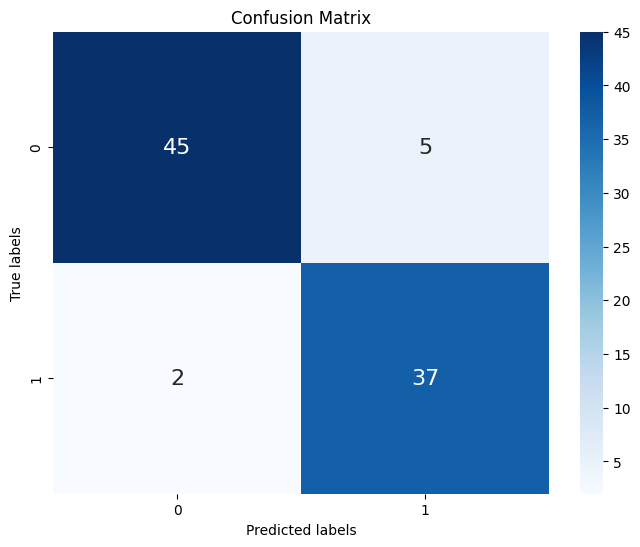

ROC-AUC Score: 0.9789743589743589


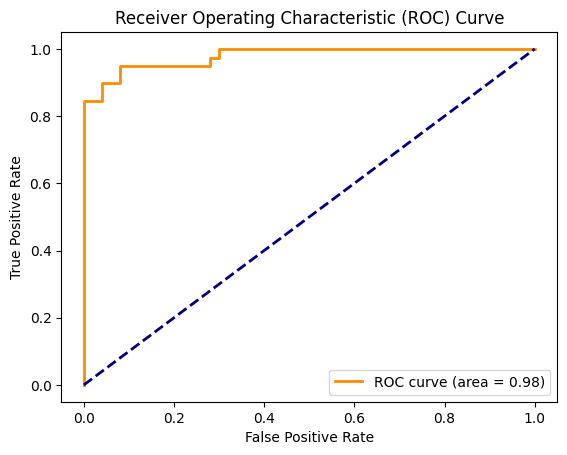

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting labels for the test set
y_pred = model_custom_cnn.predict(X_test)
y_pred_binary = np.round(y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred = model_custom_cnn.predict(X_test)
y_pred_binary = np.round(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**METRICS OVER EPOCH**

3/3 [==============================] - 0s 3ms/step


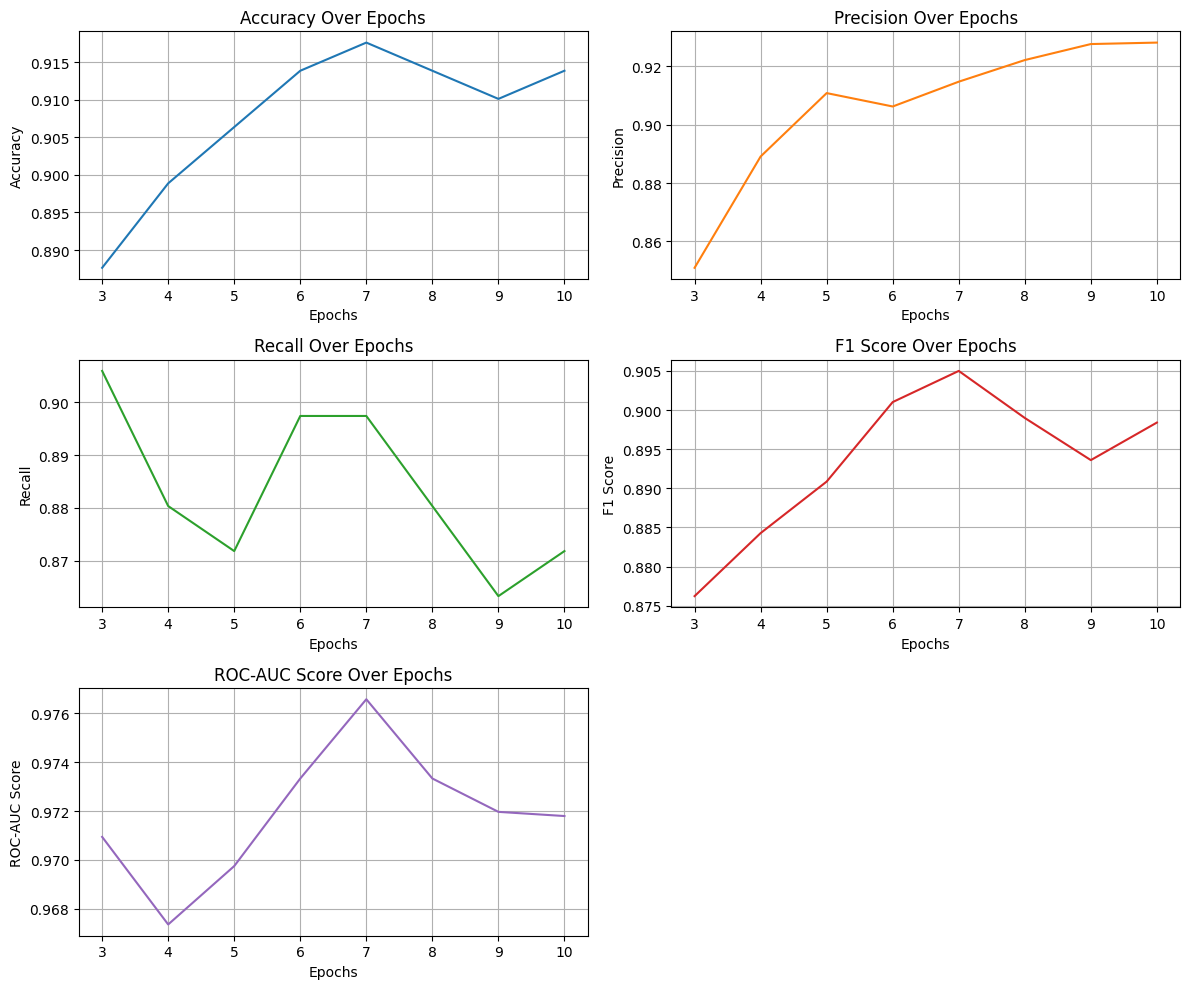

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    model_custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1)

    # Evaluate the model on the test set
    y_pred = model_custom_cnn.predict(X_test)
    y_pred_binary = np.round(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


3/3 [==============================] - 0s 3ms/step


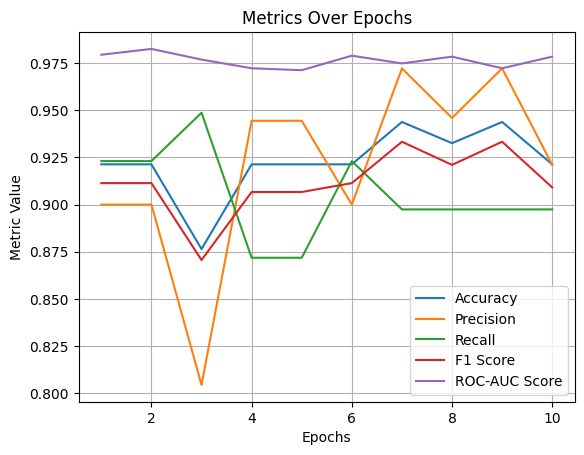

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    model_custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1)

    # Evaluate the model on the test set
    y_pred = model_custom_cnn.predict(X_test)
    y_pred_binary = np.round(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Plotting the metric values over epochs
plt.plot(epochs, accuracies, label='Accuracy')
plt.plot(epochs, precisions, label='Precision')
plt.plot(epochs, recalls, label='Recall')
plt.plot(epochs, f1_scores, label='F1 Score')
plt.plot(epochs, roc_auc_scores, label='ROC-AUC Score')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

**RESIDUE PLOT**

3/3 [==============================] - 0s 3ms/step


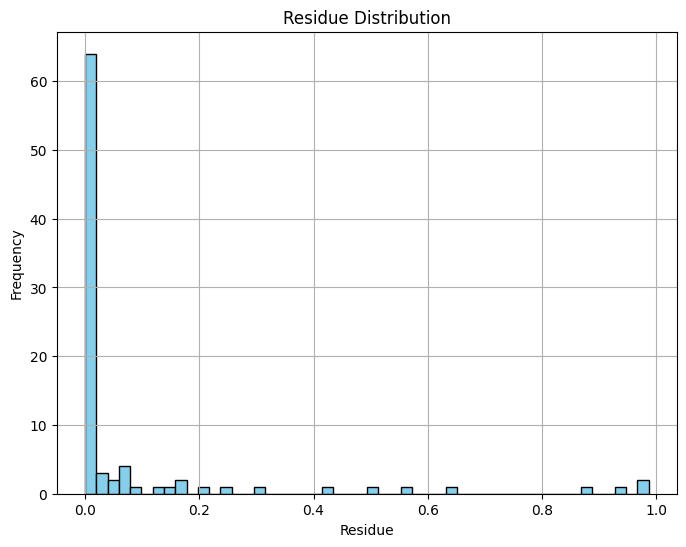

In [8]:
# Predicting probabilities for the test set
y_pred_prob = model_custom_cnn.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue = np.abs(y_test.reshape(-1) - y_pred_prob.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# RESNET50 MODEL

In [40]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Resize image
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model_resnet = Sequential([
    resnet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile ResNet50-based model
model_resnet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train ResNet50-based model
history_resnet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate ResNet50-based model
resnet_loss, resnet_accuracy = model_resnet.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_resnet = [resnet_accuracy] * 10


Unable to read image: /content/drive/MyDrive/Stage2/1710490230430.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230456.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230470.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230476.jpg. Skipping...
Epoch 1/10
11/11 [==============================] - 7s 317ms/step - loss: 8.5579 - accuracy: 0.5609
Epoch 2/10
11/11 [==============================] - 3s 309ms/step - loss: 0.4389 - accuracy: 0.6544
Epoch 3/10
11/11 [==============================] - 3s 312ms/step - loss: 0.4286 - accuracy: 0.9348
Epoch 4/10
11/11 [==============================] - 4s 316ms/step - loss: 0.3157 - accuracy: 0.9462
Epoch 5/10
11/11 [==============================] - 3s 339ms/step - loss: 0.1406 - accuracy: 0.9830
Epoch 6/10
11/11 [==============================] - 3s 307ms/step - loss: 0.0994 - accuracy: 0.9717
Epoch 7/10
11/11 [==============================] - 4s 317ms/step - 

Epoch 1/10
11/11 [==============================] - 4s 328ms/step - loss: 0.0317 - accuracy: 0.9830 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 2/10
11/11 [==============================] - 4s 319ms/step - loss: 0.0191 - accuracy: 0.9887 - val_loss: 0.0194 - val_accuracy: 0.9888
Epoch 3/10
11/11 [==============================] - 4s 318ms/step - loss: 0.0206 - accuracy: 0.9887 - val_loss: 0.0125 - val_accuracy: 0.9888
Epoch 4/10
11/11 [==============================] - 4s 318ms/step - loss: 0.0327 - accuracy: 0.9915 - val_loss: 0.0423 - val_accuracy: 0.9775
Epoch 5/10
11/11 [==============================] - 4s 320ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0421 - val_accuracy: 0.9775
Epoch 6/10
11/11 [==============================] - 4s 318ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0715 - val_accuracy: 0.9663
Epoch 7/10
11/11 [==============================] - 4s 319ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9775
Epoch 

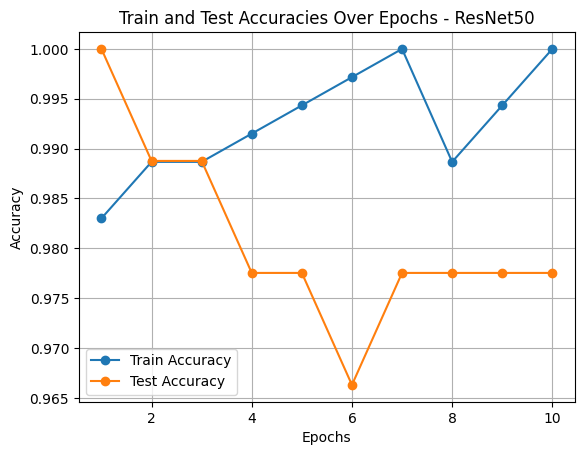

In [41]:
# Train ResNet50-based model
history_resnet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_resnet = history_resnet.history['accuracy']
test_accuracies_resnet = history_resnet.history['val_accuracy']

# Plot the accuracies over epochs for ResNet50-based model
plt.plot(range(1, 11), train_accuracies_resnet, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_resnet, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

3/3 [==============================] - 1s 20ms/step
Accuracy: 0.9775280898876404
Precision: 0.9512195121951219
Recall: 1.0
F1 Score: 0.975


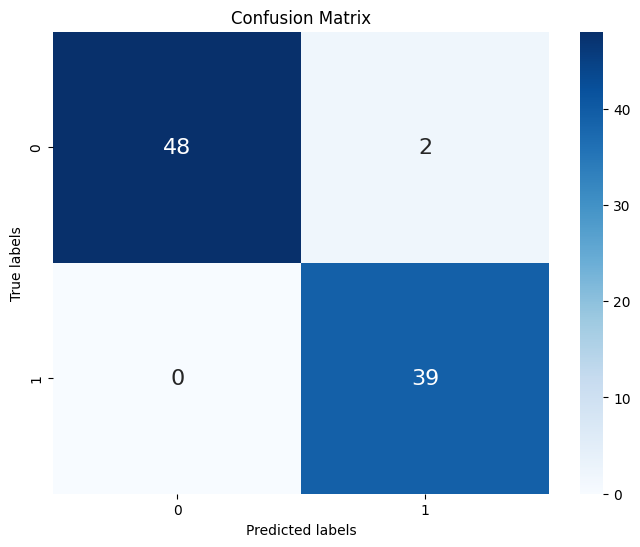

ROC-AUC Score: 1.0


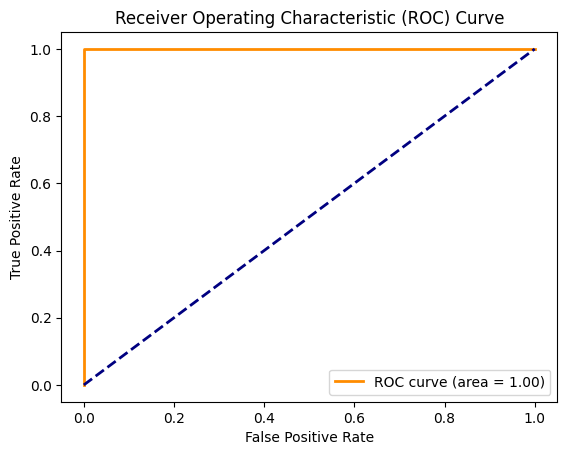

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred_resnet = model_resnet.predict(X_test)
y_pred_resnet_binary = np.round(y_pred_resnet)

# Accuracy
accuracy_resnet = accuracy_score(y_test, y_pred_resnet_binary)
print("Accuracy:", accuracy_resnet)

# Precision
precision_resnet = precision_score(y_test, y_pred_resnet_binary)
print("Precision:", precision_resnet)

# Recall
recall_resnet = recall_score(y_test, y_pred_resnet_binary)
print("Recall:", recall_resnet)

# F1 Score
f1_resnet = f1_score(y_test, y_pred_resnet_binary)
print("F1 Score:", f1_resnet)

# Confusion Matrix
cm_resnet = confusion_matrix(y_test, y_pred_resnet_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_resnet = roc_auc_score(y_test, y_pred_resnet)
print("ROC-AUC Score:", roc_auc_resnet)

# ROC Curve
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_pred_resnet)
plt.figure()
plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_resnet)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCHS**

3/3 [==============================] - 0s 20ms/step


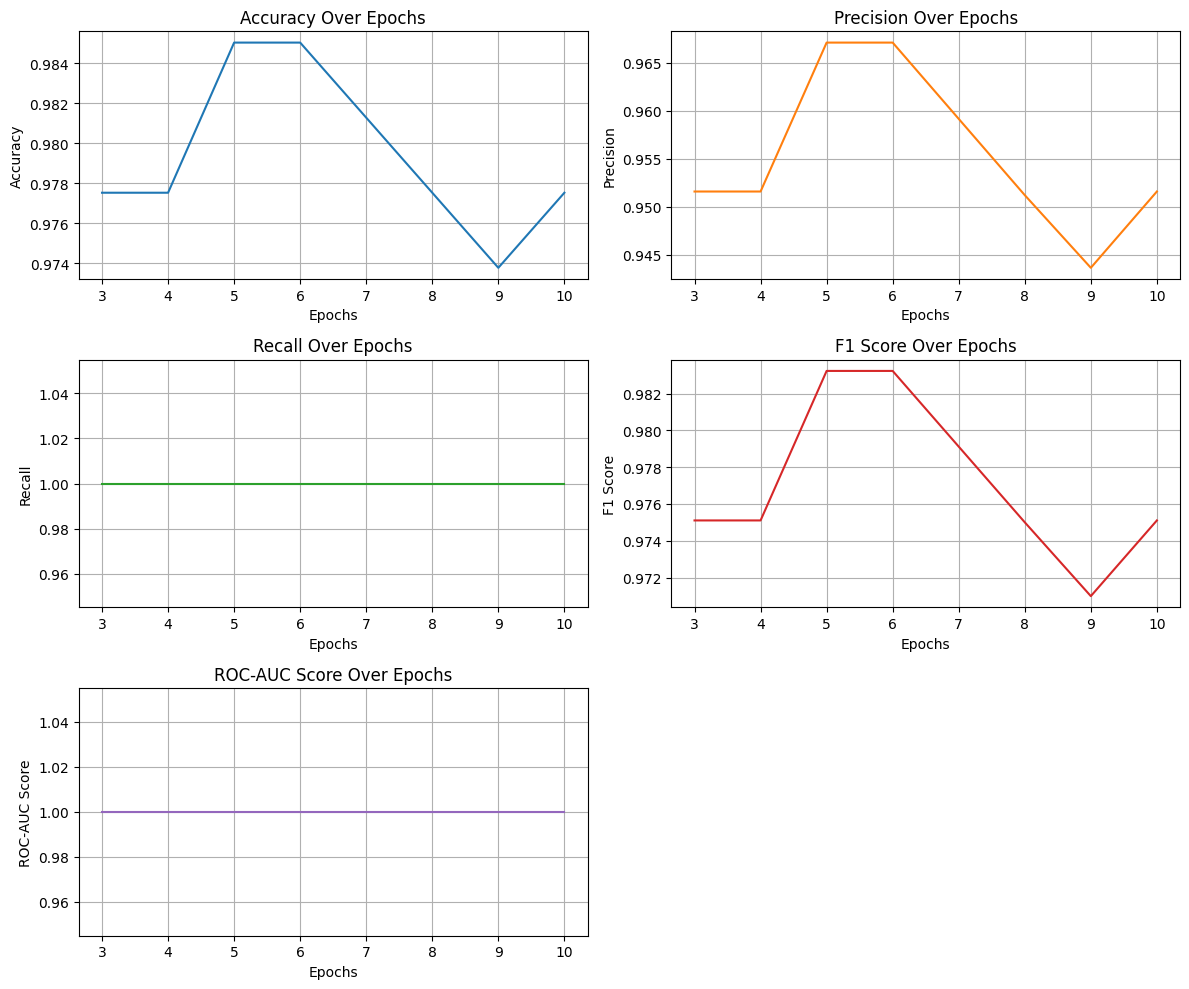

In [43]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    history_resnet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    resnet_loss, resnet_accuracy = model_resnet.evaluate(X_test, y_test)
    y_pred_resnet = model_resnet.predict(X_test)
    y_pred_resnet_binary = np.round(y_pred_resnet)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_resnet_binary)
    precision = precision_score(y_test, y_pred_resnet_binary)
    recall = recall_score(y_test, y_pred_resnet_binary)
    f1 = f1_score(y_test, y_pred_resnet_binary)
    roc_auc = roc_auc_score(y_test, y_pred_resnet)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**RESIDUE PLOTS**

3/3 [==============================] - 0s 20ms/step


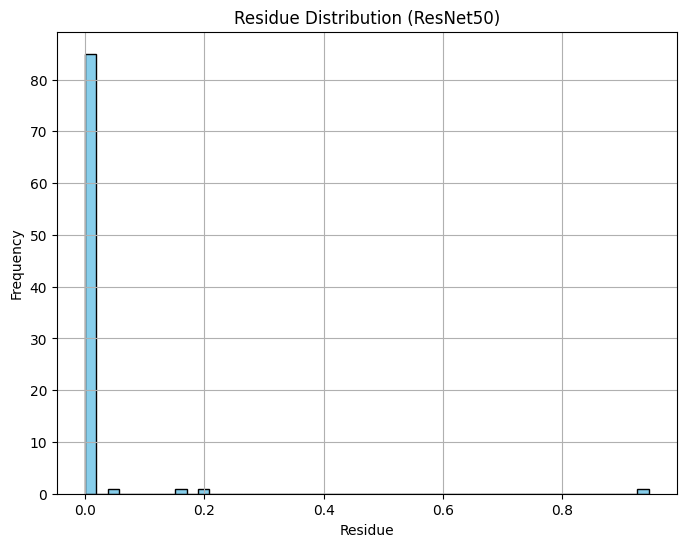

In [44]:
# Predicting probabilities for the test set
y_pred_prob_resnet = model_resnet.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_resnet = np.abs(y_test.reshape(-1) - y_pred_prob_resnet.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_resnet, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution (ResNet50)')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# VGG16 MODEL

In [14]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Resize image
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Load pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg16_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
model_vgg16 = Sequential([
    vgg16_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile VGG16-based model
model_vgg16.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train VGG16-based model
history_vgg16 = model_vgg16.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate VGG16-based model
vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_vgg16 = [vgg16_accuracy] * 10


Unable to read image: /content/drive/MyDrive/Stage2/1710490230430.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230456.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230470.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230476.jpg. Skipping...
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
11/11 [==============================] - 6s 291ms/step - loss: 10.3815 - accuracy: 0.7875
Epoch 2/10
11/11 [==============================] - 3s 311ms/step - loss: 1.6290 - accuracy: 0.9490
Epoch 3/10
11/11 [==============================] - 3s 307ms/step - loss: 0.9315 - accuracy: 0.9575
Epoch 4/10
11/11 [==============================] - 4s 314ms/step - loss: 0.4609 - accuracy: 0.9688
Epoch 5/10
11/11 [==============================] - 3s 314ms/step - loss: 0.5633 - accuracy: 0.9632
Epoch 6/10
11/11 [==============================] - 3s 307ms/step - loss: 0.3216 - accuracy: 0.9745
Ep

Epoch 1/10
11/11 [==============================] - 4s 324ms/step - loss: 0.6034 - accuracy: 0.9802 - val_loss: 1.4883 - val_accuracy: 0.9775
Epoch 2/10
11/11 [==============================] - 4s 316ms/step - loss: 0.1692 - accuracy: 0.9915 - val_loss: 0.5484 - val_accuracy: 0.9888
Epoch 3/10
11/11 [==============================] - 4s 321ms/step - loss: 0.1987 - accuracy: 0.9887 - val_loss: 0.7495 - val_accuracy: 0.9888
Epoch 4/10
11/11 [==============================] - 4s 318ms/step - loss: 0.4827 - accuracy: 0.9660 - val_loss: 0.3064 - val_accuracy: 0.9888
Epoch 5/10
11/11 [==============================] - 4s 322ms/step - loss: 0.3182 - accuracy: 0.9830 - val_loss: 1.2469 - val_accuracy: 0.9663
Epoch 6/10
11/11 [==============================] - 4s 316ms/step - loss: 0.1528 - accuracy: 0.9943 - val_loss: 0.4736 - val_accuracy: 0.9888
Epoch 7/10
11/11 [==============================] - 4s 317ms/step - loss: 0.0865 - accuracy: 0.9915 - val_loss: 1.0066 - val_accuracy: 0.9775
Epoch 

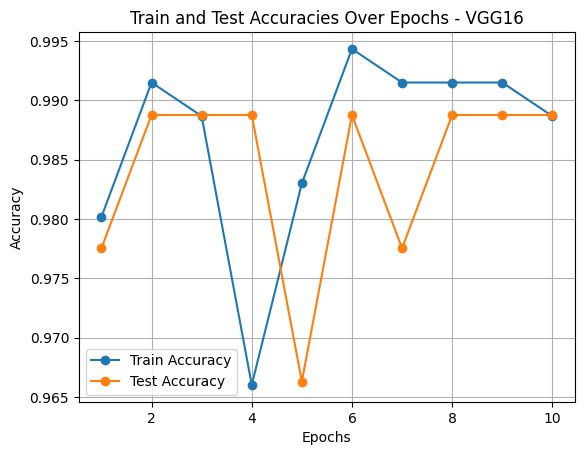

In [15]:
# Train VGG16-based model
history_vgg16 = model_vgg16.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_vgg16 = history_vgg16.history['accuracy']
test_accuracies_vgg16 = history_vgg16.history['val_accuracy']

# Plot the accuracies over epochs for VGG16-based model
plt.plot(range(1, 11), train_accuracies_vgg16, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_vgg16, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

3/3 [==============================] - 0s 21ms/step
Accuracy: 0.9887640449438202
Precision: 1.0
Recall: 0.9743589743589743
F1 Score: 0.9870129870129869


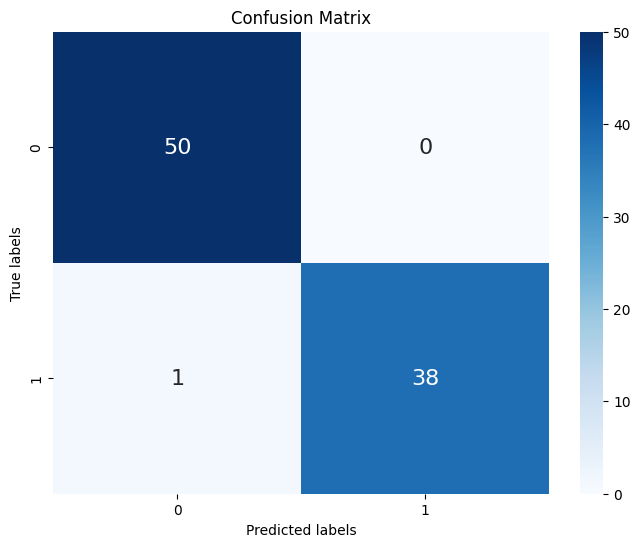

ROC-AUC Score: 1.0


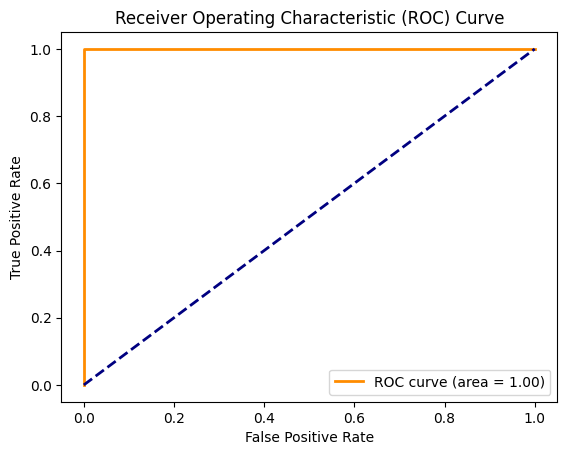

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred_resnet = model_resnet.predict(X_test)
y_pred_resnet_binary = np.round(y_pred_resnet)

# Accuracy
accuracy_resnet = accuracy_score(y_test, y_pred_resnet_binary)
print("Accuracy:", accuracy_resnet)

# Precision
precision_resnet = precision_score(y_test, y_pred_resnet_binary)
print("Precision:", precision_resnet)

# Recall
recall_resnet = recall_score(y_test, y_pred_resnet_binary)
print("Recall:", recall_resnet)

# F1 Score
f1_resnet = f1_score(y_test, y_pred_resnet_binary)
print("F1 Score:", f1_resnet)

# Confusion Matrix
cm_resnet = confusion_matrix(y_test, y_pred_resnet_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_resnet = roc_auc_score(y_test, y_pred_resnet)
print("ROC-AUC Score:", roc_auc_resnet)

# ROC Curve
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_pred_resnet)
plt.figure()
plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_resnet)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCH**

3/3 [==============================] - 0s 20ms/step


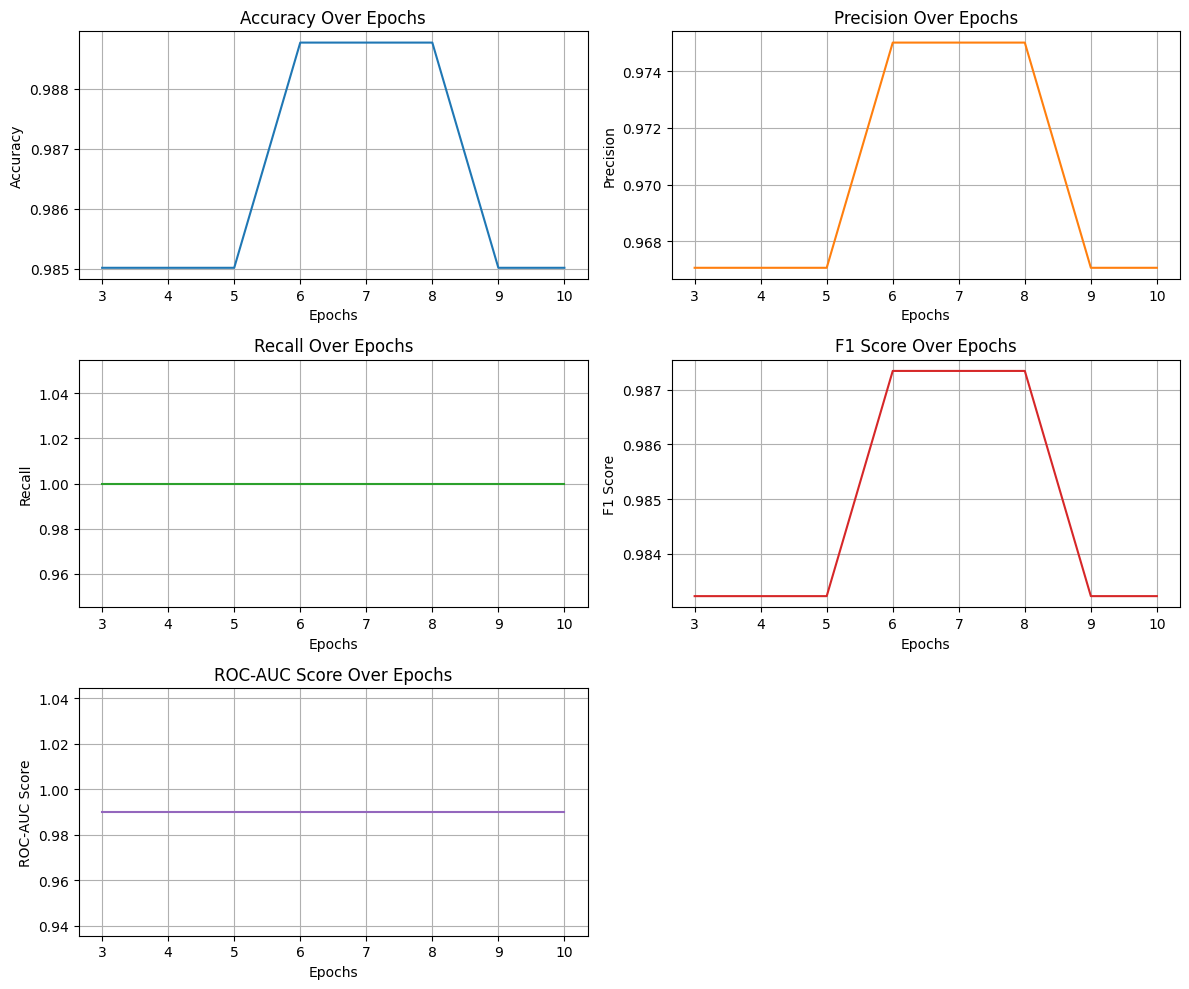

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    history_vgg16 = model_vgg16.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(X_test, y_test)
    y_pred_vgg16 = model_vgg16.predict(X_test)
    y_pred_vgg16_binary = np.round(y_pred_vgg16)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_vgg16_binary)
    precision = precision_score(y_test, y_pred_vgg16_binary)
    recall = recall_score(y_test, y_pred_vgg16_binary)
    f1 = f1_score(y_test, y_pred_vgg16_binary)
    roc_auc = roc_auc_score(y_test, y_pred_vgg16)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**RESIDUE PLOT**

3/3 [==============================] - 0s 20ms/step


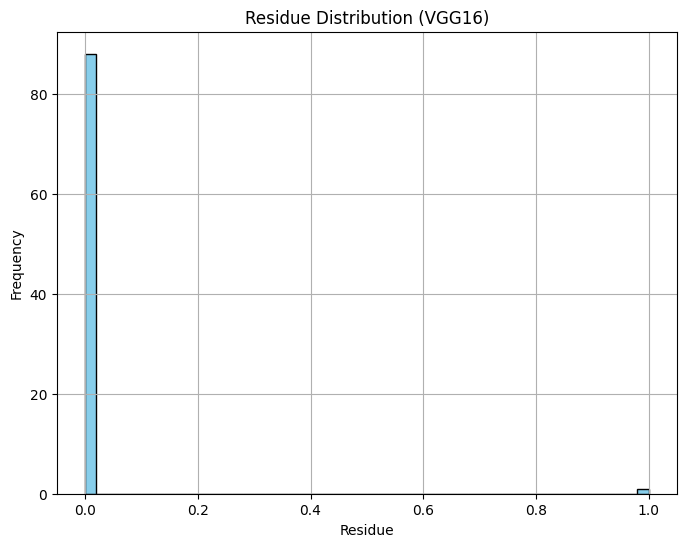

In [18]:
# Predicting probabilities for the test set
y_pred_prob_vgg16 = model_vgg16.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_vgg16 = np.abs(y_test.reshape(-1) - y_pred_prob_vgg16.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_vgg16, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution (VGG16)')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# INCEPTIONV3 MODEL

In [19]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import InceptionV3
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(299, 299)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, image_size)  # Resize image
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Define InceptionV3 model
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model_inceptionv3 = Sequential([
    base_model_inceptionv3,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_inceptionv3.layers[0].trainable = False
model_inceptionv3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train InceptionV3 model
model_inceptionv3.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate InceptionV3 model
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_inceptionv3 = [inceptionv3_accuracy] * 10



Unable to read image: /content/drive/MyDrive/Stage2/1710490230430.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230456.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230470.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230476.jpg. Skipping...
87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/10
11/11 [==============================] - 11s 459ms/step - loss: 9.3446 - accuracy: 0.6006
Epoch 2/10
11/11 [==============================] - 6s 574ms/step - loss: 2.1795 - accuracy: 0.7734
Epoch 3/10
11/11 [==============================] - 6s 561ms/step - loss: 5.2420 - accuracy: 0.7110
Epoch 4/10
11/11 [==============================] - 6s 562ms/step - loss: 1.2843 - accuracy: 0.8640
Epoch 5/10
11/11 [==============================] - 6s 567ms/step - loss: 1.2047 - accuracy: 0.8414
Epoch 6/10
11/11 [==============================] - 6s 560ms/step - loss: 1.0447 - accuracy: 0.8640
Ep

Epoch 1/10
11/11 [==============================] - 6s 571ms/step - loss: 0.5743 - accuracy: 0.9263 - val_loss: 0.9236 - val_accuracy: 0.8652
Epoch 2/10
11/11 [==============================] - 6s 569ms/step - loss: 0.3680 - accuracy: 0.9292 - val_loss: 0.5423 - val_accuracy: 0.9213
Epoch 3/10
11/11 [==============================] - 6s 567ms/step - loss: 2.2431 - accuracy: 0.8074 - val_loss: 0.6072 - val_accuracy: 0.9326
Epoch 4/10
11/11 [==============================] - 6s 562ms/step - loss: 1.9446 - accuracy: 0.8215 - val_loss: 3.0188 - val_accuracy: 0.7079
Epoch 5/10
11/11 [==============================] - 6s 570ms/step - loss: 0.6376 - accuracy: 0.8924 - val_loss: 1.1587 - val_accuracy: 0.8202
Epoch 6/10
11/11 [==============================] - 6s 574ms/step - loss: 0.5043 - accuracy: 0.9150 - val_loss: 0.5219 - val_accuracy: 0.9326
Epoch 7/10
11/11 [==============================] - 6s 573ms/step - loss: 0.3550 - accuracy: 0.9320 - val_loss: 1.5370 - val_accuracy: 0.7640
Epoch 

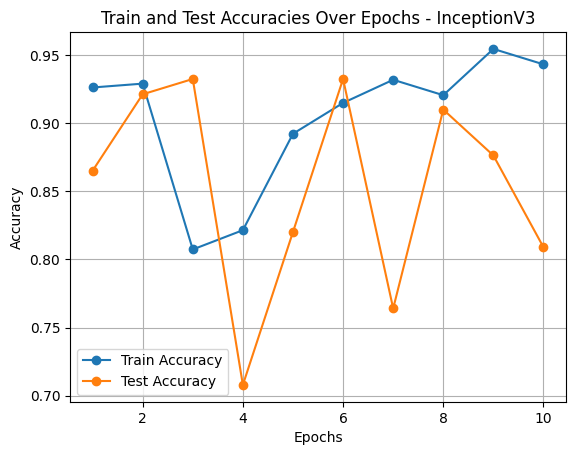

In [20]:
# Train InceptionV3 model
inceptionv3_history = model_inceptionv3.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_inceptionv3 = inceptionv3_history.history['accuracy']
test_accuracies_inceptionv3 = inceptionv3_history.history['val_accuracy']

# Plot the accuracies over epochs for InceptionV3
plt.plot(range(1, 11), train_accuracies_inceptionv3, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_inceptionv3, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

3/3 [==============================] - 1s 25ms/step
Accuracy: 0.8089887640449438
Precision: 0.7037037037037037
Recall: 0.9743589743589743
F1 Score: 0.8172043010752689
Confusion Matrix:
[[34 16]
 [ 1 38]]
ROC-AUC Score: 0.9902564102564102


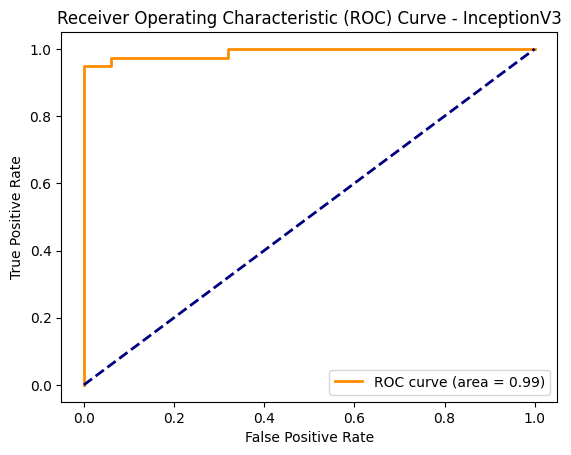

In [21]:
# Predicting labels for the test set
y_pred_inceptionv3 = model_inceptionv3.predict(X_test)
y_pred_binary_inceptionv3 = np.round(y_pred_inceptionv3)

# Accuracy
accuracy_inceptionv3 = accuracy_score(y_test, y_pred_binary_inceptionv3)
print("Accuracy:", accuracy_inceptionv3)

# Precision
precision_inceptionv3 = precision_score(y_test, y_pred_binary_inceptionv3)
print("Precision:", precision_inceptionv3)

# Recall
recall_inceptionv3 = recall_score(y_test, y_pred_binary_inceptionv3)
print("Recall:", recall_inceptionv3)

# F1 Score
f1_inceptionv3 = f1_score(y_test, y_pred_binary_inceptionv3)
print("F1 Score:", f1_inceptionv3)

# Confusion Matrix
cm_inceptionv3 = confusion_matrix(y_test, y_pred_binary_inceptionv3)
print("Confusion Matrix:")
print(cm_inceptionv3)

# ROC-AUC Score
roc_auc_inceptionv3 = roc_auc_score(y_test, y_pred_inceptionv3)
print("ROC-AUC Score:", roc_auc_inceptionv3)

# ROC Curve
fpr_inceptionv3, tpr_inceptionv3, _ = roc_curve(y_test, y_pred_inceptionv3)
plt.figure()
plt.plot(fpr_inceptionv3, tpr_inceptionv3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_inceptionv3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - InceptionV3')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCH**

3/3 [==============================] - 0s 25ms/step
Accuracy: 0.8089887640449438
Precision: 0.7037037037037037
Recall: 0.9743589743589743
F1 Score: 0.8172043010752689
Confusion Matrix:
[[34 16]
 [ 1 38]]
ROC-AUC Score: 0.9902564102564102


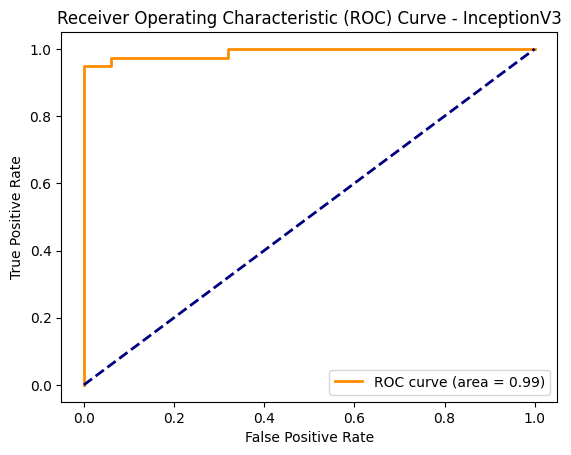

In [22]:
# Predicting labels for the test set
y_pred_inceptionv3 = model_inceptionv3.predict(X_test)
y_pred_binary_inceptionv3 = np.round(y_pred_inceptionv3)

# Accuracy
accuracy_inceptionv3 = accuracy_score(y_test, y_pred_binary_inceptionv3)
print("Accuracy:", accuracy_inceptionv3)

# Precision
precision_inceptionv3 = precision_score(y_test, y_pred_binary_inceptionv3)
print("Precision:", precision_inceptionv3)

# Recall
recall_inceptionv3 = recall_score(y_test, y_pred_binary_inceptionv3)
print("Recall:", recall_inceptionv3)

# F1 Score
f1_inceptionv3 = f1_score(y_test, y_pred_binary_inceptionv3)
print("F1 Score:", f1_inceptionv3)

# Confusion Matrix
cm_inceptionv3 = confusion_matrix(y_test, y_pred_binary_inceptionv3)
print("Confusion Matrix:")
print(cm_inceptionv3)

# ROC-AUC Score
roc_auc_inceptionv3 = roc_auc_score(y_test, y_pred_inceptionv3)
print("ROC-AUC Score:", roc_auc_inceptionv3)

# ROC Curve
fpr_inceptionv3, tpr_inceptionv3, _ = roc_curve(y_test, y_pred_inceptionv3)
plt.figure()
plt.plot(fpr_inceptionv3, tpr_inceptionv3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_inceptionv3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - InceptionV3')
plt.legend(loc="lower right")
plt.show()


**RESIDUAL PLOT**

3/3 [==============================] - 0s 25ms/step


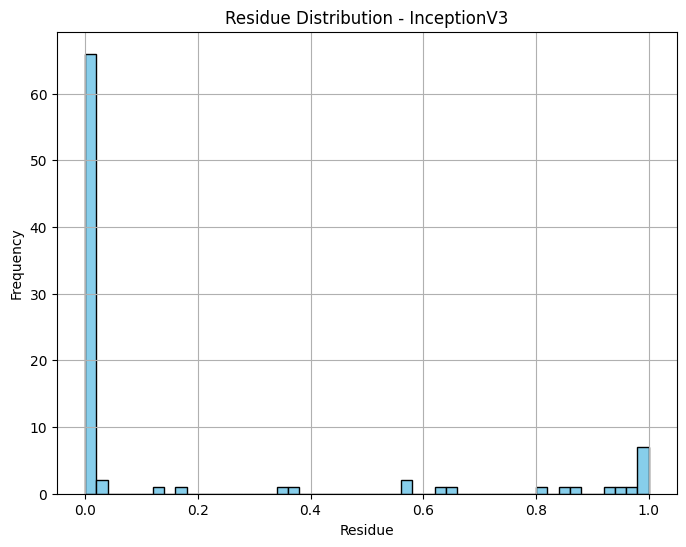

In [23]:
# Predicting probabilities for the test set
y_pred_prob_inceptionv3 = model_inceptionv3.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_inceptionv3 = np.abs(y_test.reshape(-1) - y_pred_prob_inceptionv3.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_inceptionv3, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution - InceptionV3')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# MOBILENETV2 MODEL

In [24]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, image_size)  # Resize image
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Define MobileNetV2 model
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False)
model_mobilenetv2 = Sequential([
    base_model_mobilenetv2,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_mobilenetv2.layers[0].trainable = False

# Train MobileNetV2 model
model_mobilenetv2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mobilenetv2.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)
mobilenetv2_loss, mobilenetv2_accuracy = model_mobilenetv2.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_mobilenetv2 = [mobilenetv2_accuracy] * 10



Unable to read image: /content/drive/MyDrive/Stage2/1710490230430.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230456.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230470.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230476.jpg. Skipping...


9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/10
11/11 [==============================] - 6s 313ms/step - loss: 0.7821 - accuracy: 0.6487
Epoch 2/10
11/11 [==============================] - 3s 311ms/step - loss: 0.3683 - accuracy: 0.8300
Epoch 3/10
11/11 [==============================] - 3s 343ms/step - loss: 0.2564 - accuracy: 0.8839
Epoch 4/10
11/11 [==============================] - 3s 311ms/step - loss: 0.2342 - accuracy: 0.9037
Epoch 5/10
11/11 [==============================] - 3s 310ms/step - loss: 0.1691 - accuracy: 0.9292
Epoch 6/10
11/11 [==============================] - 3s 309ms/step - loss: 0.1680 - accuracy: 0.9377
Epoch 7/10
11/11 [==============================] - 3s 314ms/step - loss: 0.1674 - accuracy: 0.9462
Epoch 8/10
11/11 [==============================] - 3s 310ms/step - loss: 0.2568 - accuracy: 0.8867
Epoch 9/10
11/11 [==============================] - 3s 308ms/step - loss: 0.1938 - accuracy: 0.9122
Epoch 10/10
3/3 [====================

Epoch 1/10
11/11 [==============================] - 4s 328ms/step - loss: 0.1977 - accuracy: 0.9122 - val_loss: 0.2627 - val_accuracy: 0.9101
Epoch 2/10
11/11 [==============================] - 4s 317ms/step - loss: 0.1225 - accuracy: 0.9518 - val_loss: 0.4052 - val_accuracy: 0.8315
Epoch 3/10
11/11 [==============================] - 4s 321ms/step - loss: 0.1377 - accuracy: 0.9433 - val_loss: 0.2142 - val_accuracy: 0.9101
Epoch 4/10
11/11 [==============================] - 4s 321ms/step - loss: 0.1123 - accuracy: 0.9575 - val_loss: 0.2884 - val_accuracy: 0.8989
Epoch 5/10
11/11 [==============================] - 4s 316ms/step - loss: 0.1102 - accuracy: 0.9462 - val_loss: 0.3521 - val_accuracy: 0.8652
Epoch 6/10
11/11 [==============================] - 3s 313ms/step - loss: 0.1349 - accuracy: 0.9462 - val_loss: 0.3390 - val_accuracy: 0.8652
Epoch 7/10
11/11 [==============================] - 4s 317ms/step - loss: 0.1058 - accuracy: 0.9632 - val_loss: 0.2491 - val_accuracy: 0.9213
Epoch 

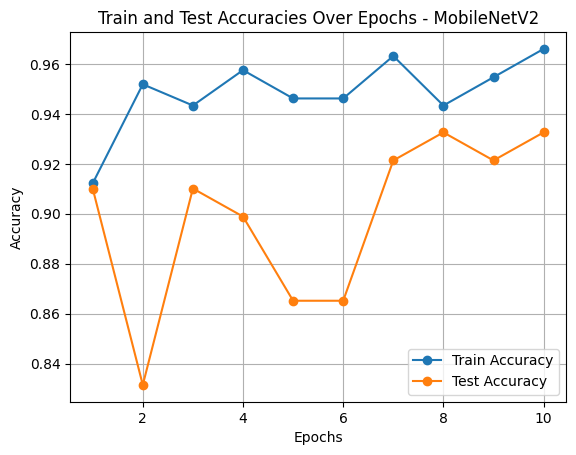

In [25]:
# Train MobileNetV2 model
mobilenetv2_history = model_mobilenetv2.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_mobilenetv2 = mobilenetv2_history.history['accuracy']
test_accuracies_mobilenetv2 = mobilenetv2_history.history['val_accuracy']

# Plot the accuracies over epochs for MobileNetV2
plt.plot(range(1, 11), train_accuracies_mobilenetv2, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_mobilenetv2, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


3/3 [==============================] - 0s 10ms/step
Accuracy: 0.9325842696629213
Precision: 0.8666666666666667
Recall: 1.0
F1 Score: 0.9285714285714286


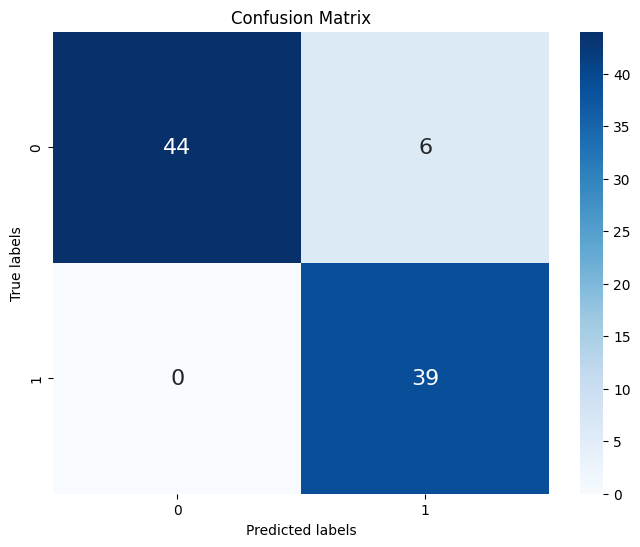

ROC-AUC Score: 0.9902564102564103


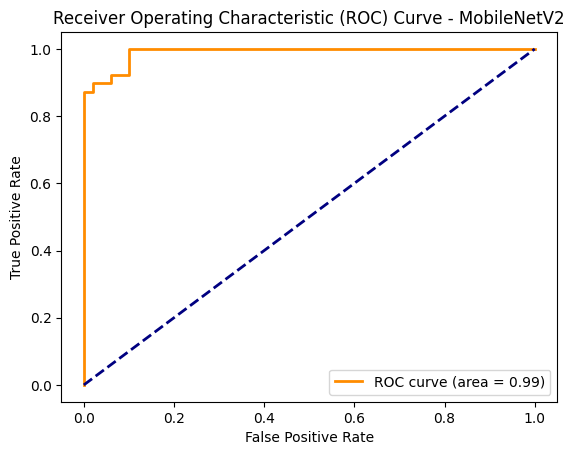

In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred_mobilenetv2 = model_mobilenetv2.predict(X_test)
y_pred_mobilenetv2_binary = np.round(y_pred_mobilenetv2)

# Accuracy
accuracy_mobilenetv2 = accuracy_score(y_test, y_pred_mobilenetv2_binary)
print("Accuracy:", accuracy_mobilenetv2)

# Precision
precision_mobilenetv2 = precision_score(y_test, y_pred_mobilenetv2_binary)
print("Precision:", precision_mobilenetv2)

# Recall
recall_mobilenetv2 = recall_score(y_test, y_pred_mobilenetv2_binary)
print("Recall:", recall_mobilenetv2)

# F1 Score
f1_mobilenetv2 = f1_score(y_test, y_pred_mobilenetv2_binary)
print("F1 Score:", f1_mobilenetv2)

# Confusion Matrix
cm_mobilenetv2 = confusion_matrix(y_test, y_pred_mobilenetv2_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mobilenetv2, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_mobilenetv2 = roc_auc_score(y_test, y_pred_mobilenetv2)
print("ROC-AUC Score:", roc_auc_mobilenetv2)

# ROC Curve
fpr_mobilenetv2, tpr_mobilenetv2, _ = roc_curve(y_test, y_pred_mobilenetv2)
plt.figure()
plt.plot(fpr_mobilenetv2, tpr_mobilenetv2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mobilenetv2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - MobileNetV2')
plt.legend(loc="lower right")
plt.show()


3/3 [==============================] - 0s 10ms/step


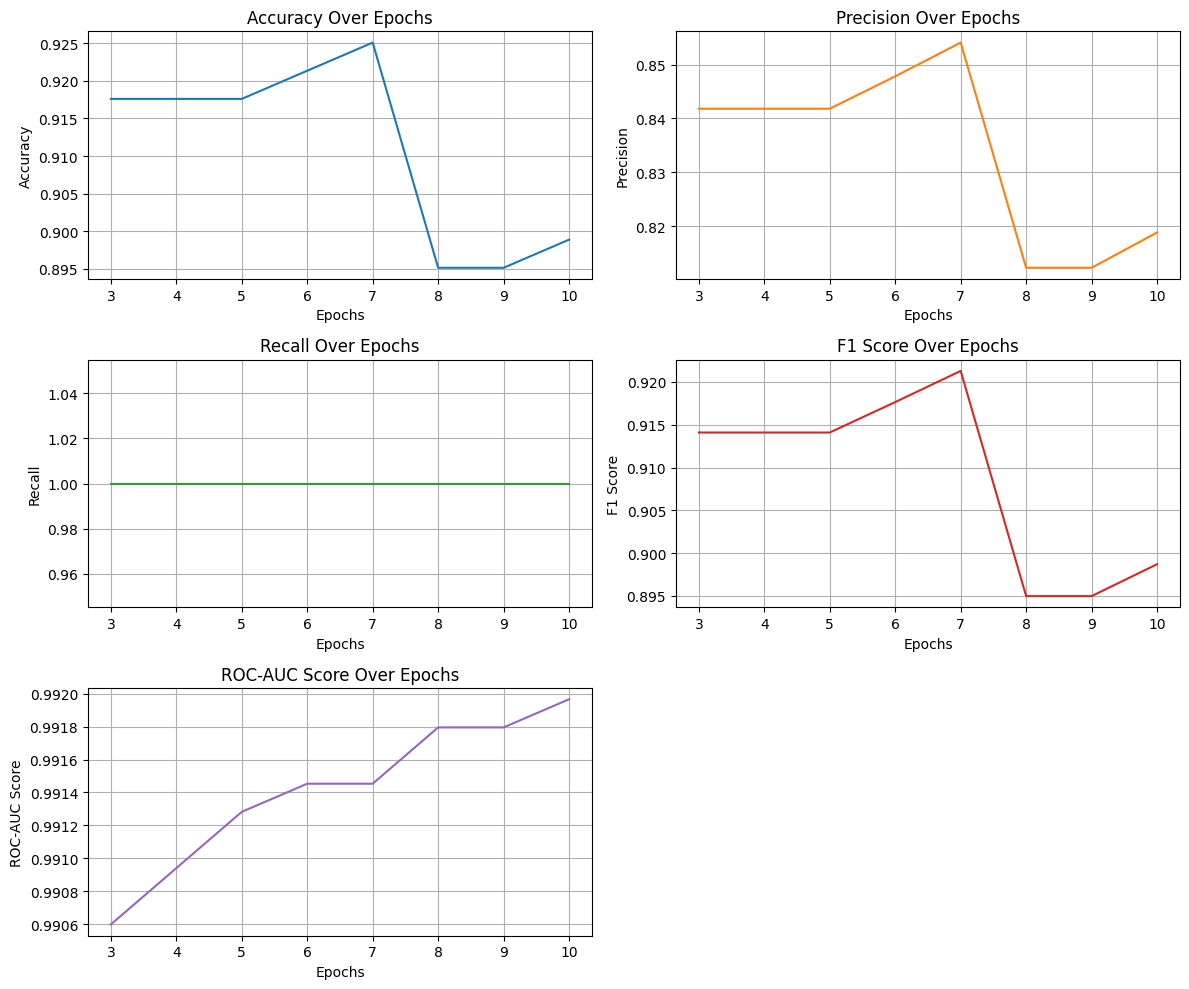

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    history_mobilenetv2 = model_mobilenetv2.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    mobilenetv2_loss, mobilenetv2_accuracy = model_mobilenetv2.evaluate(X_test, y_test)
    y_pred_mobilenetv2 = model_mobilenetv2.predict(X_test)
    y_pred_mobilenetv2_binary = np.round(y_pred_mobilenetv2)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_mobilenetv2_binary)
    precision = precision_score(y_test, y_pred_mobilenetv2_binary)
    recall = recall_score(y_test, y_pred_mobilenetv2_binary)
    f1 = f1_score(y_test, y_pred_mobilenetv2_binary)
    roc_auc = roc_auc_score(y_test, y_pred_mobilenetv2)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


3/3 [==============================] - 0s 9ms/step


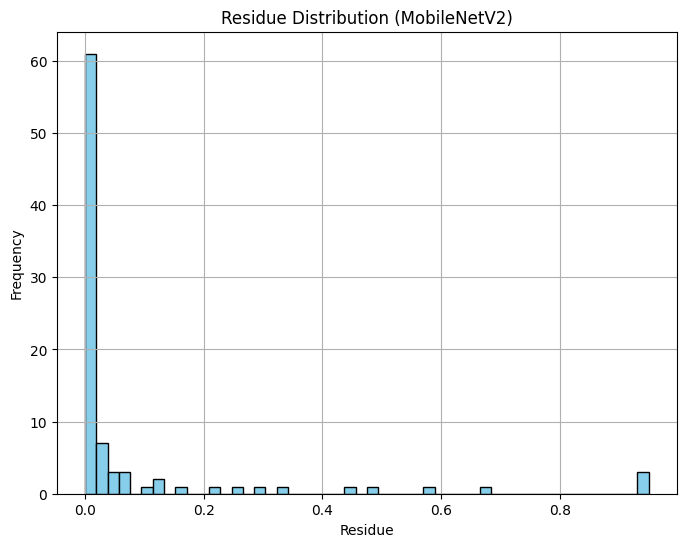

In [30]:
# Predicting probabilities for the test set
y_pred_prob_mobilenetv2 = model_mobilenetv2.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_mobilenetv2 = np.abs(y_test.reshape(-1) - y_pred_prob_mobilenetv2.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_mobilenetv2, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution (MobileNetV2)')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# EFFICIENTNETB0

In [31]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import EfficientNetB0
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, image_size)  # Resize image
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Define EfficientNetB0 model
base_model_efficientnetb0 = EfficientNetB0(weights='imagenet', include_top=False)
model_efficientnetb0 = Sequential([
    base_model_efficientnetb0,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_efficientnetb0.layers[0].trainable = False

# Train EfficientNetB0 model
model_efficientnetb0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_efficientnetb0.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)
efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_efficientnetb0 = [efficientnetb0_accuracy] * 10


Unable to read image: /content/drive/MyDrive/Stage2/1710490230430.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230456.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230470.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230476.jpg. Skipping...
16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/10
11/11 [==============================] - 10s 254ms/step - loss: 0.2834 - accuracy: 0.8697
Epoch 2/10
11/11 [==============================] - 3s 310ms/step - loss: 0.1038 - accuracy: 0.9547
Epoch 3/10
11/11 [==============================] - 3s 313ms/step - loss: 0.0602 - accuracy: 0.9830
Epoch 4/10
11/11 [==============================] - 3s 309ms/step - loss: 0.0448 - accuracy: 0.9830
Epoch 5/10
11/11 [==============================] - 4s 318ms/step - loss: 0.0287 - accuracy: 0.9887
Epoch 6/10
11/11 [==============================] - 3s 311ms/step - loss: 0.0461 - accuracy: 0.9858
Ep

Epoch 1/10
11/11 [==============================] - 4s 332ms/step - loss: 0.0150 - accuracy: 0.9943 - val_loss: 0.0339 - val_accuracy: 0.9775
Epoch 2/10
11/11 [==============================] - 4s 326ms/step - loss: 0.0606 - accuracy: 0.9745 - val_loss: 0.0303 - val_accuracy: 0.9888
Epoch 3/10
11/11 [==============================] - 4s 316ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 4s 323ms/step - loss: 0.0099 - accuracy: 0.9943 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 4s 349ms/step - loss: 0.0189 - accuracy: 0.9972 - val_loss: 0.0300 - val_accuracy: 0.9888
Epoch 6/10
11/11 [==============================] - 4s 316ms/step - loss: 0.0257 - accuracy: 0.9858 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 7/10
11/11 [==============================] - 4s 320ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9888
Epoch 

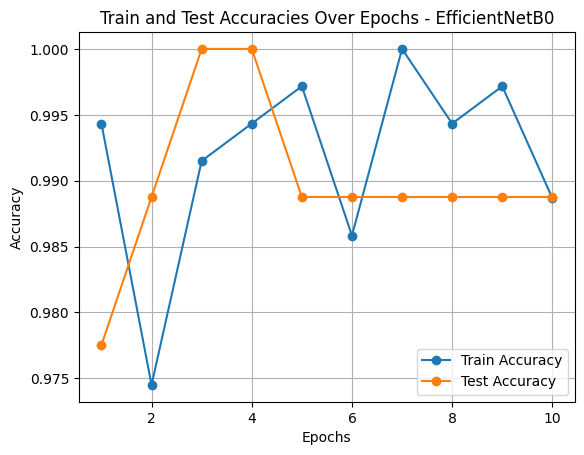

In [32]:
# Train EfficientNetB0-based model
history_efficientnetb0 = model_efficientnetb0.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_efficientnetb0 = history_efficientnetb0.history['accuracy']
test_accuracies_efficientnetb0 = history_efficientnetb0.history['val_accuracy']

# Plot the accuracies over epochs for EfficientNetB0-based model
plt.plot(range(1, 11), train_accuracies_efficientnetb0, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_efficientnetb0, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - EfficientNetB0')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


3/3 [==============================] - 1s 17ms/step
Accuracy: 0.9887640449438202
Precision: 1.0
Recall: 0.9743589743589743
F1 Score: 0.9870129870129869


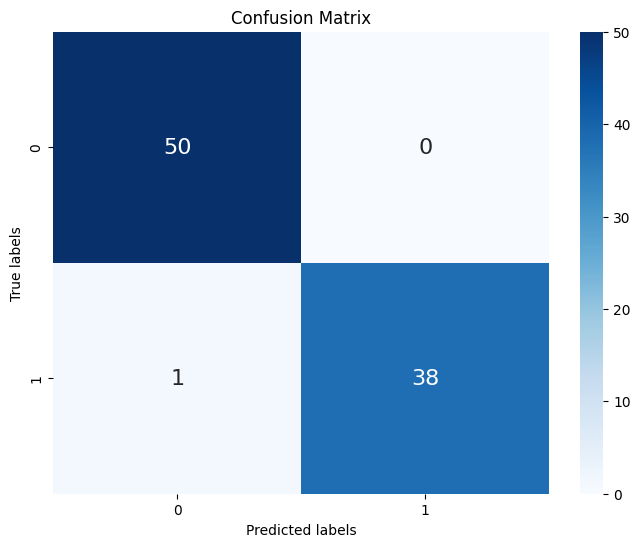

ROC-AUC Score: 1.0


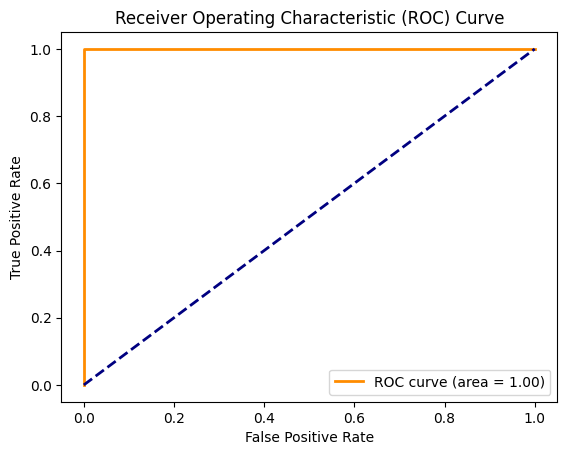

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred_efficientnetb0 = model_efficientnetb0.predict(X_test)
y_pred_efficientnetb0_binary = np.round(y_pred_efficientnetb0)

# Accuracy
accuracy_efficientnetb0 = accuracy_score(y_test, y_pred_efficientnetb0_binary)
print("Accuracy:", accuracy_efficientnetb0)

# Precision
precision_efficientnetb0 = precision_score(y_test, y_pred_efficientnetb0_binary)
print("Precision:", precision_efficientnetb0)

# Recall
recall_efficientnetb0 = recall_score(y_test, y_pred_efficientnetb0_binary)
print("Recall:", recall_efficientnetb0)

# F1 Score
f1_efficientnetb0 = f1_score(y_test, y_pred_efficientnetb0_binary)
print("F1 Score:", f1_efficientnetb0)

# Confusion Matrix
cm_efficientnetb0 = confusion_matrix(y_test, y_pred_efficientnetb0_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_efficientnetb0, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_efficientnetb0 = roc_auc_score(y_test, y_pred_efficientnetb0)
print("ROC-AUC Score:", roc_auc_efficientnetb0)

# ROC Curve
fpr_efficientnetb0, tpr_efficientnetb0, _ = roc_curve(y_test, y_pred_efficientnetb0)
plt.figure()
plt.plot(fpr_efficientnetb0, tpr_efficientnetb0, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_efficientnetb0)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


3/3 [==============================] - 0s 16ms/step


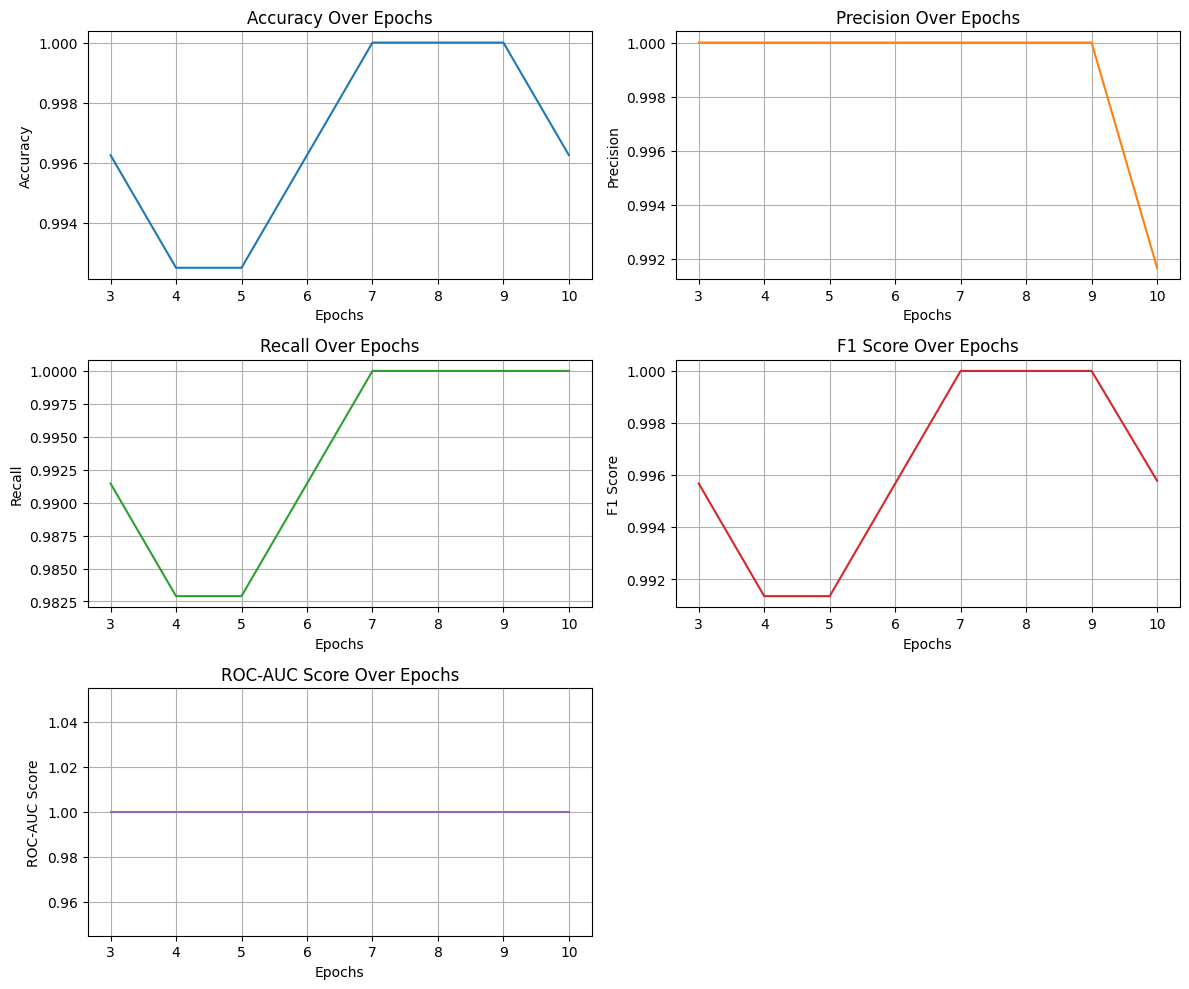

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    history_efficientnetb0 = model_efficientnetb0.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    efficientnetb0_loss, efficientnetb0_accuracy = model_efficientnetb0.evaluate(X_test, y_test)
    y_pred_efficientnetb0 = model_efficientnetb0.predict(X_test)
    y_pred_efficientnetb0_binary = np.round(y_pred_efficientnetb0)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_efficientnetb0_binary)
    precision = precision_score(y_test, y_pred_efficientnetb0_binary)
    recall = recall_score(y_test, y_pred_efficientnetb0_binary)
    f1 = f1_score(y_test, y_pred_efficientnetb0_binary)
    roc_auc = roc_auc_score(y_test, y_pred_efficientnetb0)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


3/3 [==============================] - 0s 17ms/step


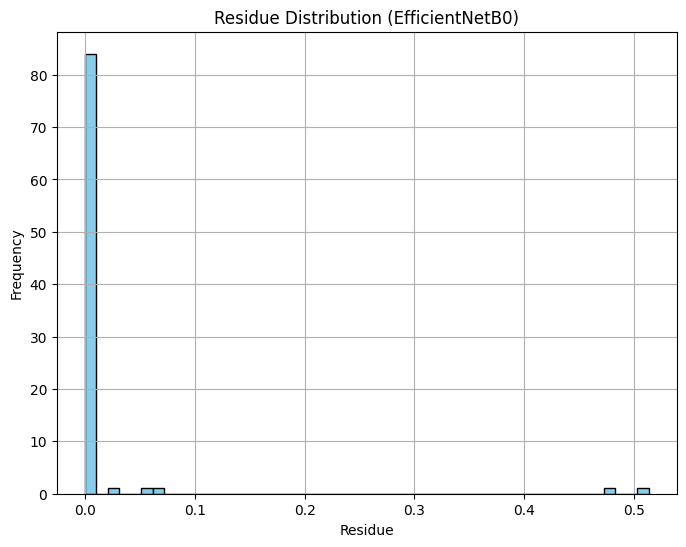

In [35]:
# Predicting probabilities for the test set
y_pred_prob_efficientnetb0 = model_efficientnetb0.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_efficientnetb0 = np.abs(y_test.reshape(-1) - y_pred_prob_efficientnetb0.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_efficientnetb0, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution (EfficientNetB0)')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# YOLOV3

In [46]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import average_precision_score

# Step 1: Preprocess the dataset

def preprocess_dataset(folder_path, stage_label, image_size=(416, 416)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(filepath)
            if img is None:
                print(f"Unable to read image: {filepath}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Resize image
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {filepath}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 3: Define YOLOv3 Model

def yolo_v3(input_shape, num_classes):
    inputs = Input(input_shape)

    # Define YOLOv3 architecture layers here
    # Example:
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    # Add more layers...

    x = Flatten()(x)
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (416, 416, 3)
num_classes = 1  # Assuming binary classification

# Create YOLOv3 model
model = yolo_v3(input_shape, num_classes)

# Step 4: Compile the model
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Extract accuracy for comparison
test_accuracy = history.history['val_accuracy']

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Step 7: Perform inference (if needed)

# Step 8: Deployment (if needed)

# Store the accuracy in a separate variable for comparison
yolo_accuracy = test_accuracy


Unable to read image: /content/drive/MyDrive/Stage2/1710490230430.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230456.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230470.jpg. Skipping...
Unable to read image: /content/drive/MyDrive/Stage2/1710490230476.jpg. Skipping...


Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 378.7579 - accuracy: 0.7365
Epoch 1: val_loss improved from inf to 3215.00171, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 3s 95ms/step - loss: 378.7579 - accuracy: 0.7365 - val_loss: 3215.0017 - val_accuracy: 0.6966
Epoch 2/10
11/12 [==========================>...] - ETA: 0s - loss: 170.5484 - accuracy: 0.8778
Epoch 2: val_loss improved from 3215.00171 to 1711.46399, saving model to best_model.h5
12/12 [==============================] - 1s 75ms/step - loss: 170.0653 - accuracy: 0.8782 - val_loss: 1711.4640 - val_accuracy: 0.5843
Epoch 3/10
11/12 [==========================>...] - ETA: 0s - loss: 50.5911 - accuracy: 0.9318
Epoch 3: val_loss did not improve from 1711.46399
12/12 [==============================] - 1s 48ms/step - loss: 50.4478 - accuracy: 0.9320 - val_loss: 1977.7716 - val_accuracy: 0.5056
Epoch 4/10
11/12 [==========================>...] - ETA: 0s - loss: 28.8713 - accuracy: 0.9489
Epoch 4: val_loss improved from 1711.46399 to 131.13158, saving model to best_model.h5
12/12 [==============================] - 1s 74ms/step - loss: 28.7895 - accuracy: 0.9

Epoch 1/10
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 104.75407, saving model to best_model_yolo.h5
12/12 [==============================] - 1s 83ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 104.7541 - val_accuracy: 0.9326
Epoch 2/10
11/12 [==========================>...] - ETA: 0s - loss: 0.2779 - accuracy: 0.9972    
Epoch 2: val_loss improved from 104.75407 to 79.23052, saving model to best_model_yolo.h5
12/12 [==============================] - 1s 74ms/step - loss: 0.2771 - accuracy: 0.9972 - val_loss: 79.2305 - val_accuracy: 0.9326
Epoch 3/10
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 79.23052
12/12 [==============================] - 1s 48ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 165.8956 - val_accuracy: 0.8539
Epoch 4/10
11/12 [==========================>...] - ETA: 0s - loss: 0.9320 - acc

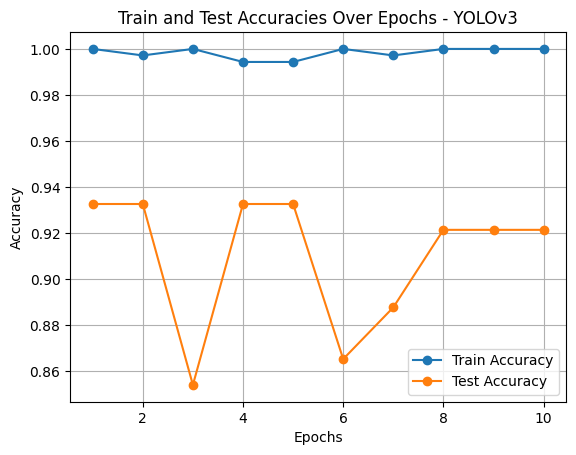

In [47]:
# Train YOLOv3 model
checkpoint_yolo = ModelCheckpoint('best_model_yolo.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
history_yolo = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint_yolo])

# Store train and test accuracies of each epoch during training for YOLOv3 model
train_accuracies_yolo = history_yolo.history['accuracy']
test_accuracies_yolo = history_yolo.history['val_accuracy']

# Plot the accuracies over epochs for YOLOv3 model
plt.plot(range(1, 11), train_accuracies_yolo, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_yolo, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - YOLOv3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


3/3 [==============================] - 0s 14ms/step
Accuracy: 0.9213483146067416
Precision: 0.8809523809523809
Recall: 0.9487179487179487
F1 Score: 0.9135802469135802
Confusion Matrix:
[[45  5]
 [ 2 37]]
ROC-AUC Score: 0.9243589743589744


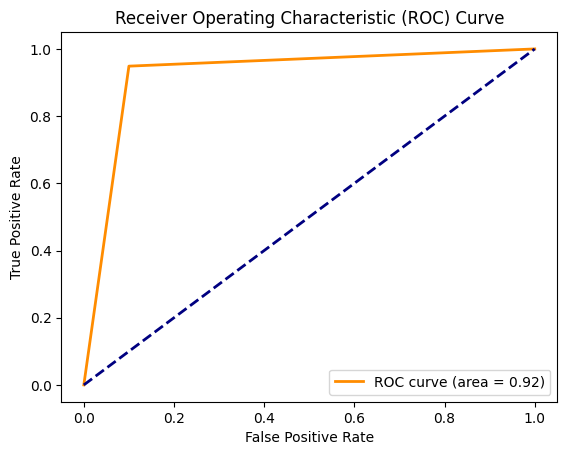

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting labels for the test set
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


12/12 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 91.67693, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 15ms/step - loss: 91.6769 - accuracy: 0.9213
Epoch 1: Test loss: 91.67693328857422, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 7.7117e-38 - accuracy: 1.0000
Epoch 1: val_loss improved from 91.67693 to 90.78809, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 15ms/step - loss: 90.7881 - accuracy: 0.9213
Epoch 2: Test loss: 90.7880859375, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 90.78809 to 90.09026, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 16ms/step - loss: 90.0903 - accuracy: 0.9213
Epoch 3: Test loss: 90.09026336669922, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 90.09026 to 88.99236, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 16ms/step - loss: 88.9924 - accuracy: 0.9213
Epoch 4: Test loss: 88.99235534667969, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 88.99236 to 88.59856, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 16ms/step - loss: 88.5986 - accuracy: 0.9213
Epoch 5: Test loss: 88.59855651855469, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 88.59856 to 87.65707, saving model to best_model.h5
12/12 [==============================] - 2s 136ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 87.6571 - val_accuracy: 0.9213


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 15ms/step - loss: 87.6571 - accuracy: 0.9213
Epoch 6: Test loss: 87.65707397460938, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 87.65707 to 87.25137, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 16ms/step - loss: 87.2514 - accuracy: 0.9213
Epoch 7: Test loss: 87.25137329101562, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 87.25137 to 86.92952, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 16ms/step - loss: 86.9295 - accuracy: 0.9213
Epoch 8: Test loss: 86.92951965332031, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 86.92952 to 86.06386, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 15ms/step - loss: 86.0639 - accuracy: 0.9213
Epoch 9: Test loss: 86.06385803222656, Test accuracy: 0.9213483333587646
11/12 [==========================>...] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1: val_loss improved from 86.06386 to 85.37605, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 15ms/step - loss: 85.3761 - accuracy: 0.9213
Epoch 10: Test loss: 85.37605285644531, Test accuracy: 0.9213483333587646
3/3 [==============================] - 0s 14ms/step


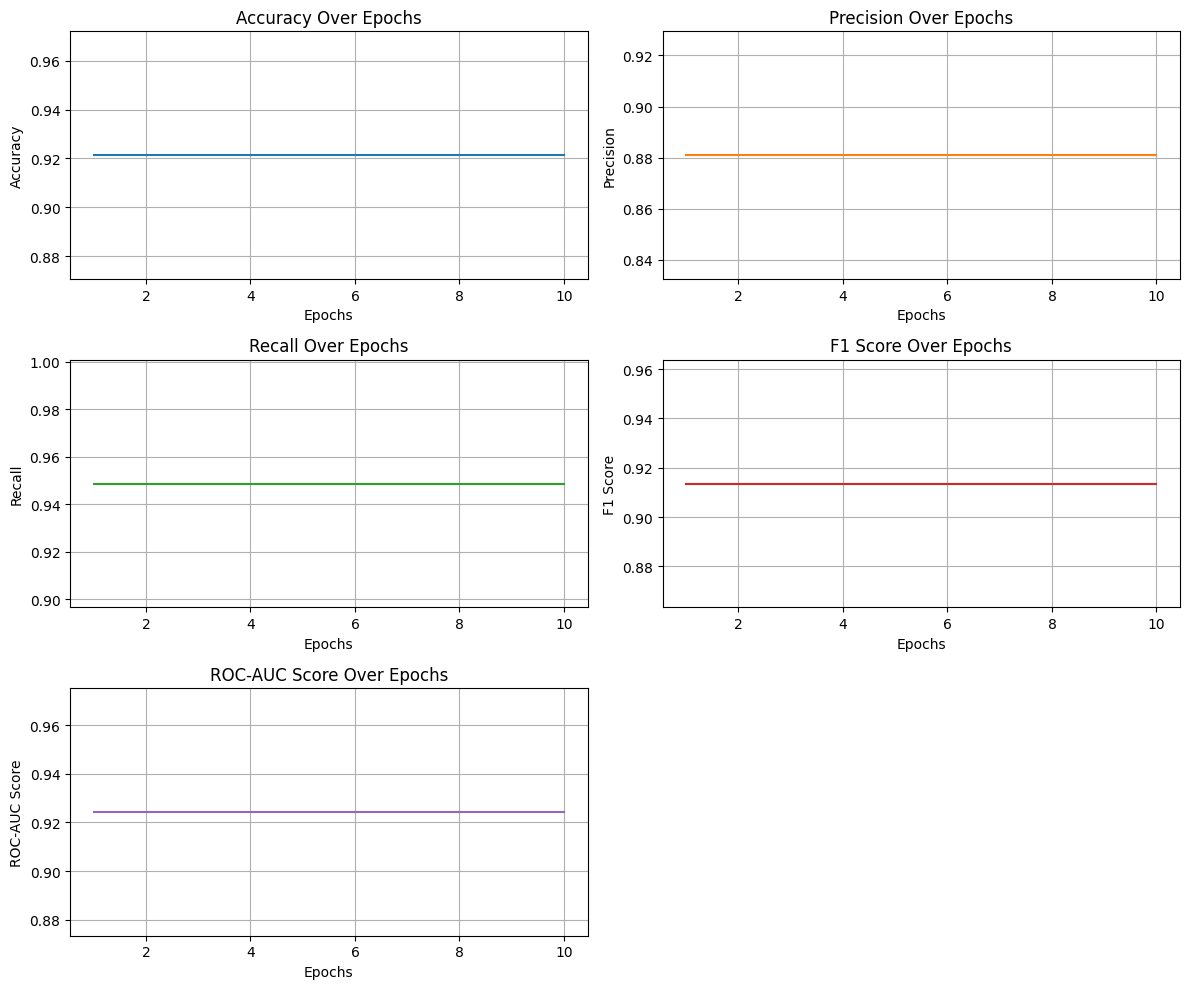

In [52]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Step 5: Train the model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
for epoch in epochs:
    history = model.fit(X_train, y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test), callbacks=[checkpoint])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Epoch {epoch}: Test loss: {loss}, Test accuracy: {accuracy}')

    # Append metric values
    y_pred = model.predict(X_test)
    y_pred_binary = np.round(y_pred)
    accuracies.append(accuracy_score(y_test, y_pred_binary))
    precisions.append(precision_score(y_test, y_pred_binary))
    recalls.append(recall_score(y_test, y_pred_binary))
    f1_scores.append(f1_score(y_test, y_pred_binary))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot accuracy
axs[0, 0].plot(epochs, accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

# Plot precision
axs[0, 1].plot(epochs, precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

# Plot recall
axs[1, 0].plot(epochs, recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# Plot F1-score
axs[1, 1].plot(epochs, f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

# Plot ROC-AUC score
axs[2, 0].plot(epochs, roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 14ms/step


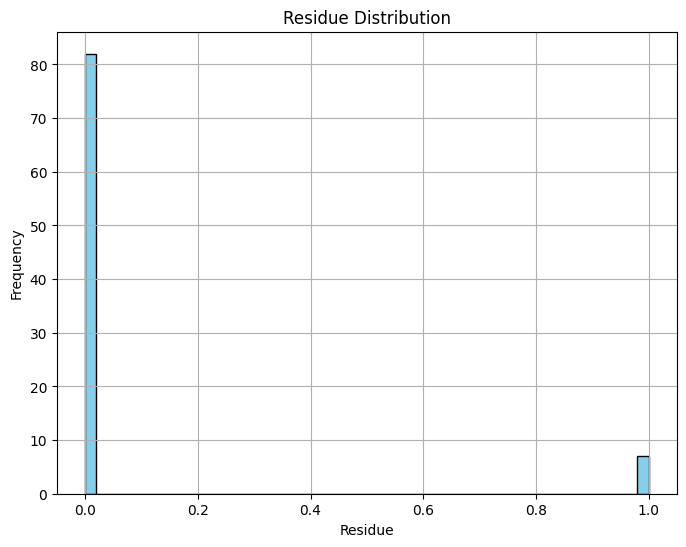

In [53]:
# Predicting probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue = np.abs(y_test.reshape(-1) - y_pred_prob.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# COMPARISON

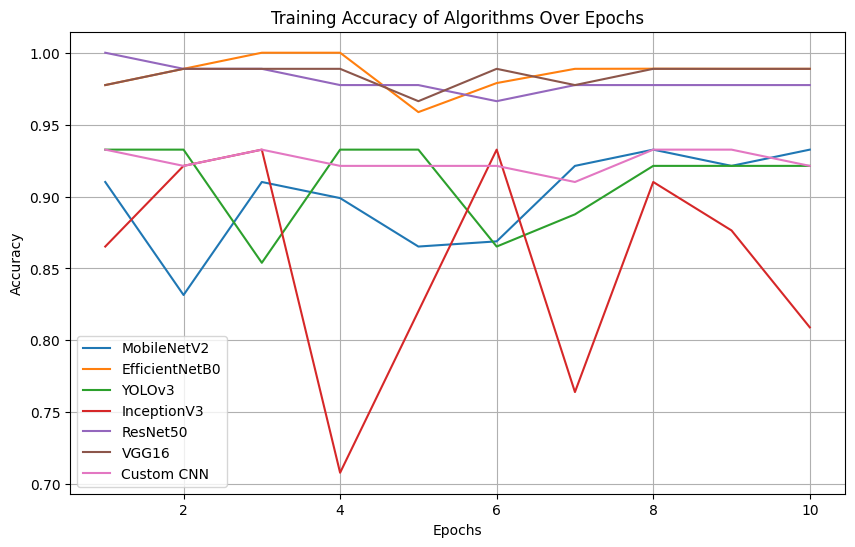

In [56]:
import matplotlib.pyplot as plt

# Define epochs (assuming 10 epochs)
epochs = range(1, 11)

# Accuracy values for each algorithm over epochs
accuracies = {
    'MobileNetV2': [0.9101,0.8315,0.9101,0.8989,0.8652,0.8688,0.9213,0.9326,0.9213,0.9326],
    'EfficientNetB0': [0.9775,0.9888,1.000,1.000,0.9587,0.9789,0.9888,0.98888,0.9888,0.9888],
    'YOLOv3': [0.9326,0.9326,0.8539,0.9326,0.9326,0.8652,0.8876,0.9213,0.9213,0.9213],
    'InceptionV3': [0.8652,0.9213,0.9326,0.7079,0.8202,0.9326,0.7640,0.9101,0.8764,0.8090],
    'ResNet50': [1.0000,0.9888,0.9888,0.9775,0.9775,0.9663,0.9775,0.9775,0.9775,0.9775],
    'VGG16': [0.9775,0.9888,0.9888,0.9888,0.9663,0.9888,0.9775,0.9888,0.9888,0.9888],
    'Custom CNN': [0.9326,0.9213,0.9326,0.9213,0.9213,0.9213,0.9101,0.9326,0.9326,0.9213]
}

# Plotting the line graph for accuracy over epochs
plt.figure(figsize=(10, 6))

for alg_name, accuracy_values in accuracies.items():
    plt.plot(epochs, accuracy_values, label=alg_name)

plt.title('Training Accuracy of Algorithms Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


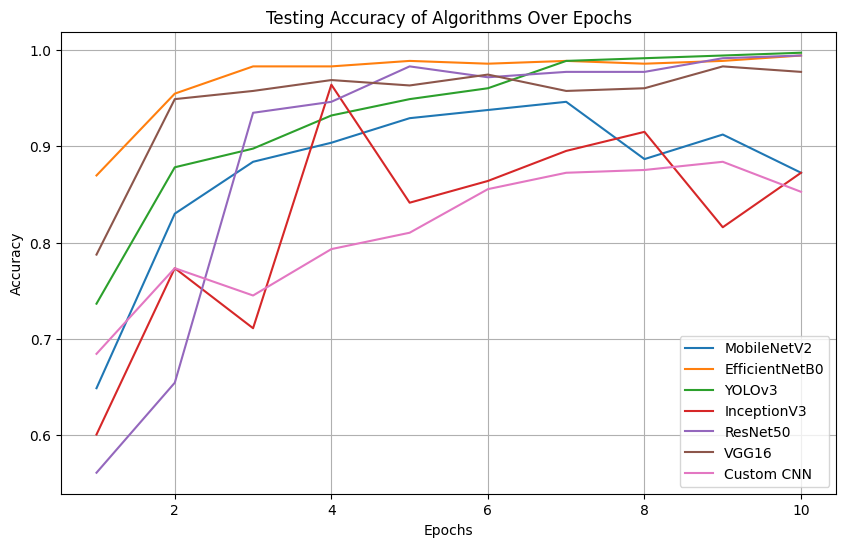

In [58]:
import matplotlib.pyplot as plt

# Define epochs (assuming 10 epochs)
epochs = range(1, 11)

# Accuracy values for each algorithm over epochs
accuracies = {
    'MobileNetV2': [0.6487,0.8300,0.8839,0.9037,0.9292,0.9377,0.9462,0.8867,0.9122,0.8725],
    'EfficientNetB0': [0.8697,0.9547,0.9830,0.9830,0.9887,0.9858,0.9887,0.9858,0.9887,0.9943],
    'YOLOv3': [0.7365,0.8782,0.8976,0.9320,0.9490,0.9603,0.9887,0.9915,0.9943,0.9972,],
    'InceptionV3': [0.6006,0.7734,0.7110,0.9640,0.8414,0.8640,0.8952,0.9150,0.8159,0.8725],
    'ResNet50': [0.5609,0.6544,0.9348,0.9462,0.9830,0.9717,0.9773,0.9773,0.9915,0.9943],
    'VGG16': [0.7875,0.9490,0.9575,0.9688,0.9632,0.9745,0.9575,0.9603,0.9830,0.9773],
    'Custom CNN': [0.6844,0.7734,0.7450,0.7932,0.8102,0.8555,0.8725,0.8754,0.8839,0.8527]
}

# Plotting the line graph for accuracy over epochs
plt.figure(figsize=(10, 6))

for alg_name, accuracy_values in accuracies.items():
    plt.plot(epochs, accuracy_values, label=alg_name)

plt.title('Testing Accuracy of Algorithms Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
